In [1]:
import sys, os


project_root = os.path.abspath("..")
sys.path.append(project_root)

print("Project root:", project_root)


Project root: /mnt/d/myfile/university/project/brain-tumor-classification


In [2]:
import torch
import torch.nn as nn
from torch.optim import Adam
import matplotlib.pyplot as plt

from src.models.baseline_cnn import BaselineCNN
from src.data.dataloaders import create_dataloaders


In [3]:
train_loader, val_loader, test_loader, label_to_index = create_dataloaders("..")
num_classes = len(label_to_index)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [4]:
model = BaselineCNN(num_classes).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = Adam(model.parameters(), lr=3e-4)

EPOCHS = 10

train_losses, val_losses = [], []
train_accs, val_accs = [], []

for epoch in range(1, EPOCHS + 1):
    # ---------- TRAIN ----------
    model.train()
    total_loss = 0
    total_correct = 0
    total = 0

    for x, y in train_loader:
        x, y = x.to(device), y.to(device)

        optimizer.zero_grad()
        out = model(x)
        loss = criterion(out, y)
        loss.backward()
        optimizer.step()

        total_loss += loss.item() * x.size(0)
        total_correct += (out.argmax(1) == y).sum().item()
        total += x.size(0)

    train_loss = total_loss / total
    train_acc = total_correct / total
    train_losses.append(train_loss)
    train_accs.append(train_acc)

    # ---------- VALIDATION ----------
    model.eval()
    val_loss = 0
    val_correct = 0
    val_total = 0

    with torch.no_grad():
        for x, y in val_loader:
            x, y = x.to(device), y.to(device)
            out = model(x)
            loss = criterion(out, y)

            val_loss += loss.item() * x.size(0)
            val_correct += (out.argmax(1) == y).sum().item()
            val_total += x.size(0)

    val_loss /= val_total
    val_acc = val_correct / val_total
    val_losses.append(val_loss)
    val_accs.append(val_acc)

    print(f"Epoch {epoch}/{EPOCHS} | "
          f"Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.3f} | "
          f"Val Loss: {val_loss:.4f} | Val Acc: {val_acc:.3f}")


Epoch 1/10 | Train Loss: 0.9855 | Train Acc: 0.594 | Val Loss: 1.0543 | Val Acc: 0.562
Epoch 2/10 | Train Loss: 0.8142 | Train Acc: 0.663 | Val Loss: 0.9040 | Val Acc: 0.644
Epoch 3/10 | Train Loss: 0.7717 | Train Acc: 0.689 | Val Loss: 0.7189 | Val Acc: 0.747
Epoch 4/10 | Train Loss: 0.7117 | Train Acc: 0.711 | Val Loss: 1.1042 | Val Acc: 0.532
Epoch 5/10 | Train Loss: 0.6753 | Train Acc: 0.744 | Val Loss: 1.1559 | Val Acc: 0.564
Epoch 6/10 | Train Loss: 0.6339 | Train Acc: 0.754 | Val Loss: 0.7265 | Val Acc: 0.716
Epoch 7/10 | Train Loss: 0.6166 | Train Acc: 0.764 | Val Loss: 0.5965 | Val Acc: 0.787
Epoch 8/10 | Train Loss: 0.5824 | Train Acc: 0.776 | Val Loss: 0.8339 | Val Acc: 0.660
Epoch 9/10 | Train Loss: 0.5930 | Train Acc: 0.774 | Val Loss: 0.5932 | Val Acc: 0.719
Epoch 10/10 | Train Loss: 0.5839 | Train Acc: 0.769 | Val Loss: 0.5085 | Val Acc: 0.825


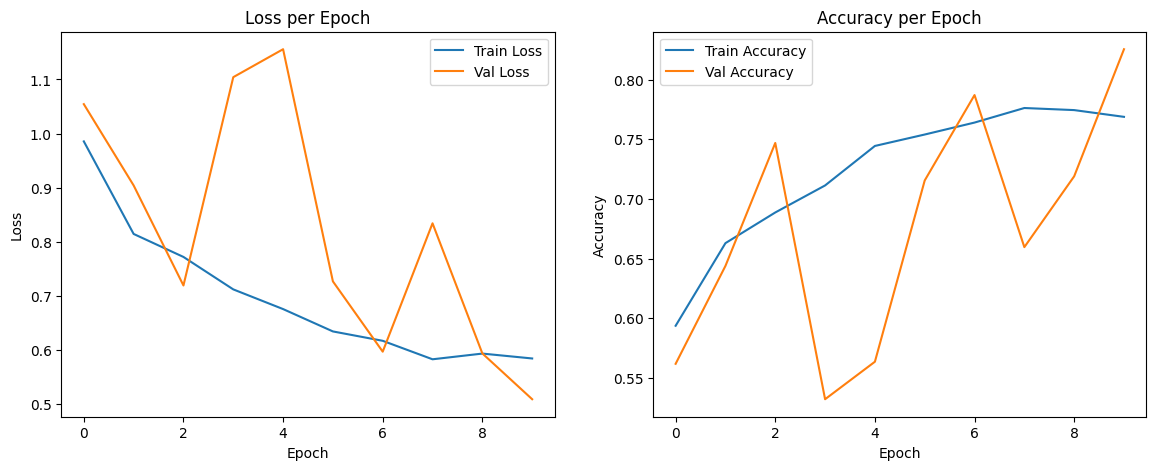

In [5]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
plt.plot(train_losses, label="Train Loss")
plt.plot(val_losses, label="Val Loss")
plt.title("Loss per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.subplot(1,2,2)
plt.plot(train_accs, label="Train Accuracy")
plt.plot(val_accs, label="Val Accuracy")
plt.title("Accuracy per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.show()
